## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

## Explore data

### Read raw data from file

In [2]:
raw_data = pd.read_csv('../data/data.csv')
raw_data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,California,Female,Excellent,NaN,3.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,67.13,26.22,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
1,California,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.83,86.18,25.77,No,Yes,No,No,"Yes, received Tdap",No,No
2,California,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,8.0,1 to 5,No,...,1.63,55.79,21.11,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,California,Female,Good,0.0,30.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,No,...,1.75,72.57,23.63,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
4,California,Male,Good,12.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.73,65.77,22.05,Yes,No,Yes,Yes,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,California,Male,Good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.83,65.77,19.67,Yes,Yes,No,Yes,"Yes, received Tdap",No,No
10948,California,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.78,90.72,28.70,Yes,NaN,Yes,Yes,NaN,No,Tested positive using home test without a heal...
10949,California,Female,Fair,5.0,5.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.57,68.04,27.44,No,No,Yes,NaN,"No, did not receive any tetanus shot in the pa...",No,Yes
10950,California,Female,Excellent,0.0,2.0,Within past 2 years (1 year but less than 2 ye...,Yes,10.0,None of them,No,...,1.75,58.97,19.20,No,Yes,No,NaN,"Yes, received Tdap",No,Yes


### How many rows and how many columns does the raw data have?

In [3]:
# Todo

### What are the meanings of each row?

### Does the raw data have duplicate rows? (if it has, handle it)

In [4]:
# Todo

### What does each column mean?

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

In [5]:
# Todo

### Convert columns having inappropriate data type

In [6]:
# Todo

### For each column with numeric data type, how are the values distributed?

With each numerical column, how are values distributed?
- What is the percentage of missing values?
- If there are missing values, handle them.
- Min? max? Are they abnormal?
- Missing value treatment.

#### Select numeric columns

In [7]:
num_col_df = raw_data.select_dtypes(include='float64')
num_col_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,NaN,3.0,7.0,1.60,67.13,26.22
1,0.0,0.0,6.0,1.83,86.18,25.77
2,0.0,0.0,8.0,1.63,55.79,21.11
3,0.0,30.0,7.0,1.75,72.57,23.63
4,12.0,0.0,8.0,1.73,65.77,22.05
...,...,...,...,...,...,...
10947,0.0,3.0,5.0,1.83,65.77,19.67
10948,0.0,0.0,8.0,1.78,90.72,28.70
10949,5.0,5.0,7.0,1.57,68.04,27.44
10950,0.0,2.0,10.0,1.75,58.97,19.20


#### Explore the distribution using descriptive statistics

In [8]:
def missing_ratio(col):
    return (col.isna().sum() * 100 / len(col)).round(1)

def lower_quartile(col):
    return col.quantile(0.25).round(1)

def upper_quartile(col):
    return col.quantile(0.75).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, 'min', lower_quartile, 'median', upper_quartile, 'max'])
num_col_info_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
missing_ratio,4.6,3.8,1.5,9.60,10.40,13.60
min,0.0,0.0,1.0,1.25,25.40,12.21
lower_quartile,0.0,0.0,6.0,1.60,65.80,23.30
median,0.0,0.0,7.0,1.70,77.11,26.58
upper_quartile,4.0,5.0,8.0,1.80,90.70,30.40
max,30.0,30.0,24.0,2.36,272.16,91.45


**Observation:**
- The percentage of missing values of each numeric column is low so we won't drop any of these columns.
- The minimum and maximum values of each numeric column are within normal ranges. There are no negative or out-of-range numbers.
- The distribution of the first two columns, PhysicalHealthDays and MentalHealthDays, is right-skewed so we will fill missing values with the median.

#### Handle missing values

In [9]:
raw_data[num_col_df.columns] = raw_data[num_col_df.columns].fillna(num_col_df.median())

#### Visualize the distribution 

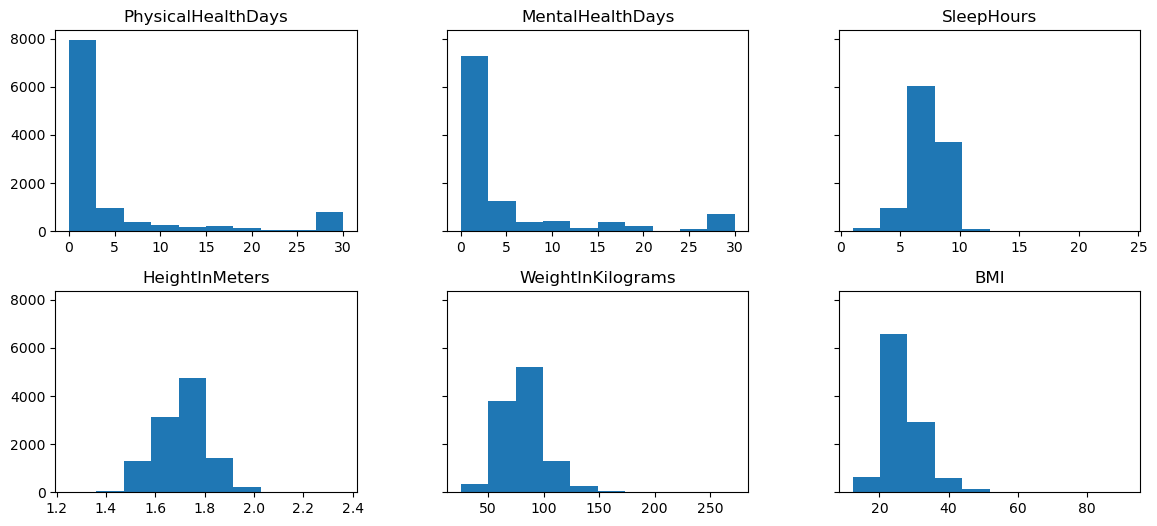

In [10]:
raw_data[num_col_df.columns].hist(bins=10, layout=(2, 3), figsize=(14, 6), sharey=True, grid=False);

### Is there any columns need to be encoded? 

#### Select columns to encode

In [19]:
encoded_cols = ['GeneralHealth', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 
                'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 
                'HighRiskLastYear', 'CovidPos']

encoded_col_df = raw_data[encoded_cols]
encoded_col_df 

,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,Excellent,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,Yes,No,No
1,Very good,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,No,No,No
2,Very good,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,Yes,No,No
3,Good,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Good,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,Good,Yes,No,No,No,No,No,No,Yes,No,...,No,No,No,Yes,Yes,Yes,No,Yes,No,No
10948,Good,Yes,No,Yes,No,No,No,No,No,No,...,No,No,No,Yes,Yes,NaN,Yes,Yes,No,Tested positive using home test without a heal...
10949,Fair,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,NaN,No,Yes
10950,Excellent,Yes,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,No,NaN,No,Yes


#### Explore the distribution

In [20]:
def missing_ratio(col):
    return (col.isna().sum() * 100 / len(col)).round(1)

def num_values(col):
    return col.nunique()

def value_ratios(col):
    percentage = (col.value_counts(normalize=True) * 100).round(1)
    return percentage.to_dict()

encoded_col_info_df = encoded_col_df.agg([missing_ratio, num_values, value_ratios])
encoded_col_info_df

,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
missing_ratio,0.3,0.4,0.9,1.1,0.7,0.7,1.0,0.9,1.0,0.7,...,7.5,7.5,8.1,15.4,14.0,18.8,14.7,24.2,15.9,16.0
num_values,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
value_ratios,"{'Very good': 32.5, 'Good': 31.4, 'Excellent':...","{'Yes': 80.3, 'No': 19.7}","{'No': 95.9, 'Yes': 4.1}","{'No': 96.1, 'Yes': 3.9}","{'No': 96.6, 'Yes': 3.4}","{'No': 84.3, 'Yes': 15.7}","{'No': 93.2, 'Yes': 6.8}","{'No': 94.4, 'Yes': 5.6}","{'No': 80.0, 'Yes': 20.0}","{'No': 96.4, 'Yes': 3.6}",...,"{'No': 86.9, 'Yes': 13.1}","{'No': 96.2, 'Yes': 3.8}","{'No': 92.7, 'Yes': 7.3}","{'No': 63.8, 'Yes': 36.2}","{'Yes': 56.8, 'No': 43.2}","{'No': 59.1, 'Yes': 40.9}","{'No': 50.7, 'Yes': 49.3}","{'No': 65.5, 'Yes': 34.5}","{'No': 92.9, 'Yes': 7.1}","{'No': 65.6, 'Yes': 28.4, 'Tested positive usi..."


Observation:

## Outliers detection